<a href="https://colab.research.google.com/github/SRG08/Data-Science-End-to-End-Project/blob/main/Time_Series_Analysis_for_MetRail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline
  import seaborn as sns

  import warnings
  warnings.filterwarnings('ignore')

In [21]:
data = pd.read_csv("/content/drive/MyDrive/Time_series_Forcasting/Metrail+dataset.csv")
data.head()

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [33]:
data.columns = ['Month' , 'Travellers']
data["Month"] = pd.to_datetime(data['Month'] , format="%b-%y")
data = data.set_index('Month')
data.head()

,Travellers
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN


## Time series Analysis

### Plot Time series Data

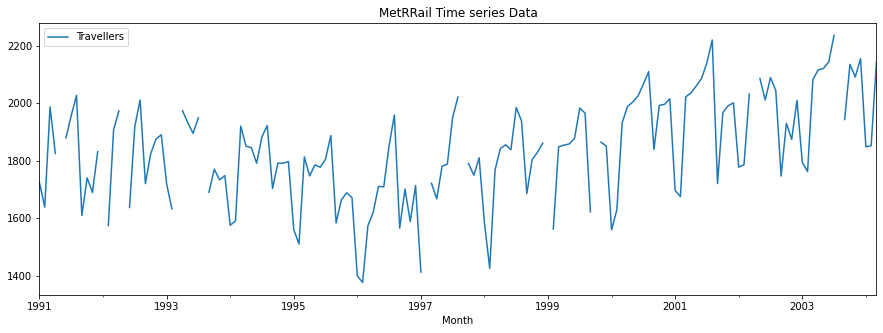

In [40]:
data.plot(figsize=(15,5))
plt.legend(loc='best')
plt.title("MetRRail Time series Data")
plt.show(block=False)

### Missing Value Treatement

#### Mean Imputation

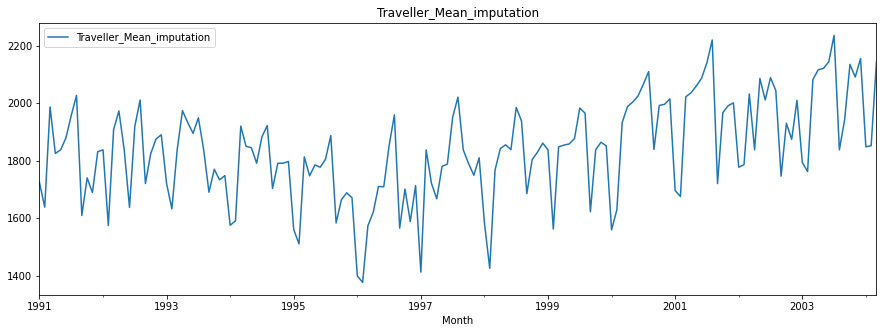

In [47]:
data = data.assign(Traveller_Mean_imputation = data.Travellers.fillna(data.Travellers.mean()))
data[['Traveller_Mean_imputation']].plot(figsize = (15,5))
plt.legend(loc='best')
plt.title("Traveller_Mean_imputation")
plt.show(block=False)

#### Linear Interpolation

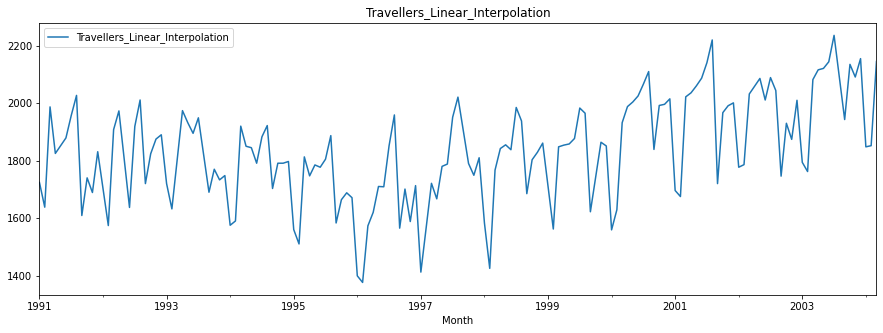

In [46]:
data = data.assign(Travellers_Linear_Interpolation = data.Travellers.interpolate(method = 'linear'))
data[['Travellers_Linear_Interpolation']].plot(figsize = (15,5))
plt.legend(loc='best')
plt.title("Travellers_Linear_Interpolation")
plt.show(block=False)

In [49]:
data.Travellers_Linear_Interpolation.mean()

1836.566037735849

#### Imputing missing value with the last value observed

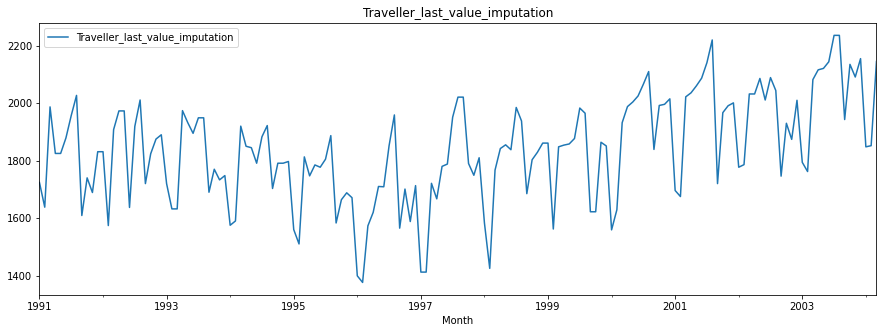

In [50]:
data = data.assign(Traveller_last_value_imputation = data.Travellers.fillna(method='pad'))
data[['Traveller_last_value_imputation']].plot(figsize = (15,5))
plt.legend(loc='best')
plt.title("Traveller_last_value_imputation")
plt.show(block=False)

In [51]:
data.Traveller_last_value_imputation.mean()

1838.685534591195

#### Imputing missing value with the next value observed

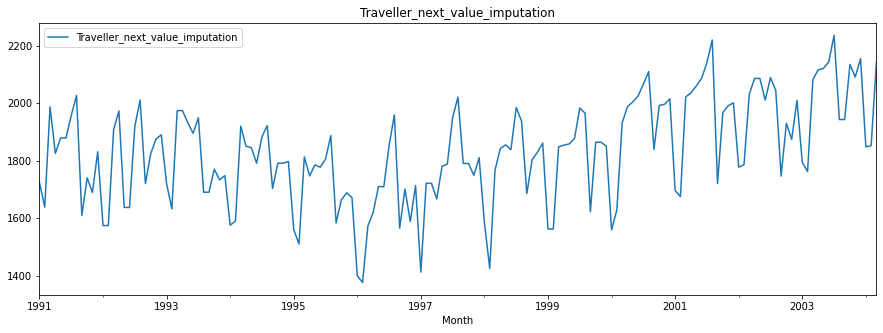

In [52]:
data = data.assign(Traveller_next_value_imputation = data.Travellers.fillna(method='backfill'))
data[['Traveller_next_value_imputation']].plot(figsize = (15,5))
plt.legend(loc='best')
plt.title("Traveller_next_value_imputation")
plt.show(block=False)

In [53]:
data.Traveller_next_value_imputation.mean()

1834.446540880503

### Handling Outliers

#### Boxplot and interquartile range

In [56]:
data['Travellers'] = data['Travellers_Linear_Interpolation']

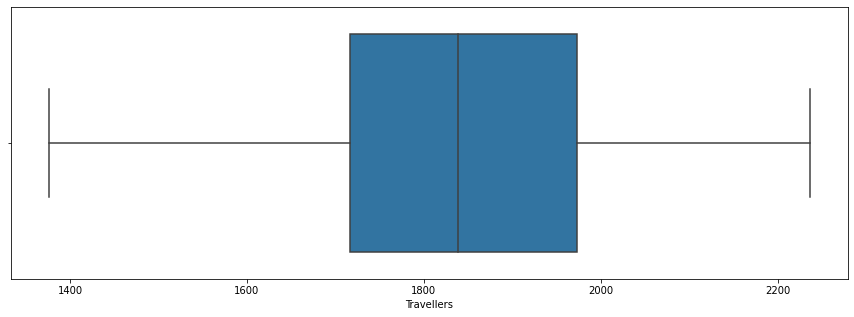

In [65]:
fig = plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=data['Travellers'] , whis=1.4)

#### Plotting Histogram

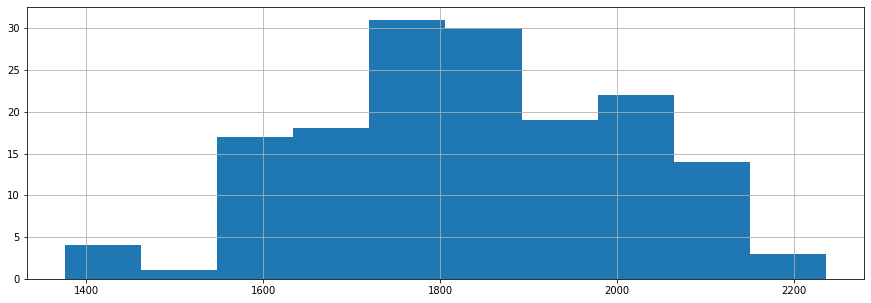

In [66]:
fig = data.Travellers.hist(figsize=(15,5))

### Time Series Decomposition

#### Additive Seasonal Decomposition

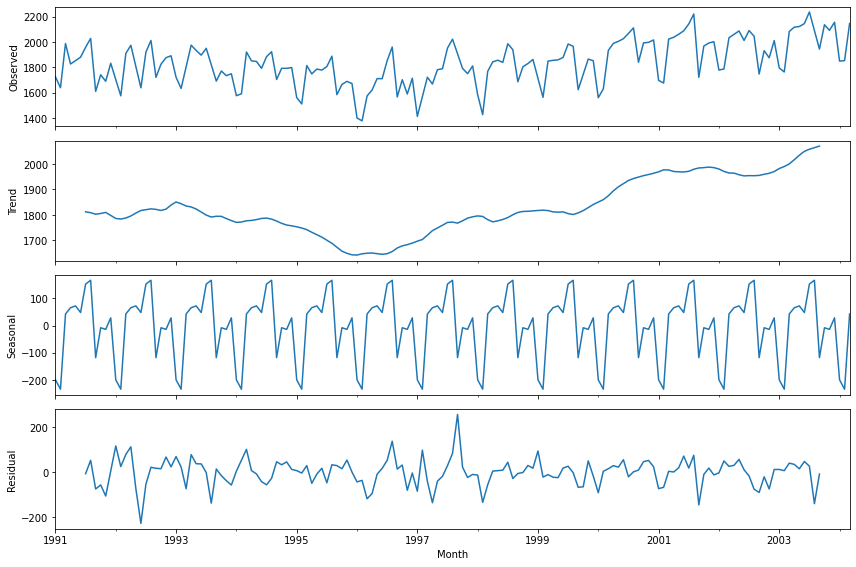

In [76]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Travellers , model="additive")
fig = decomposition.plot()
plt.show()

#### Multiplicative Seasonal Decomposition

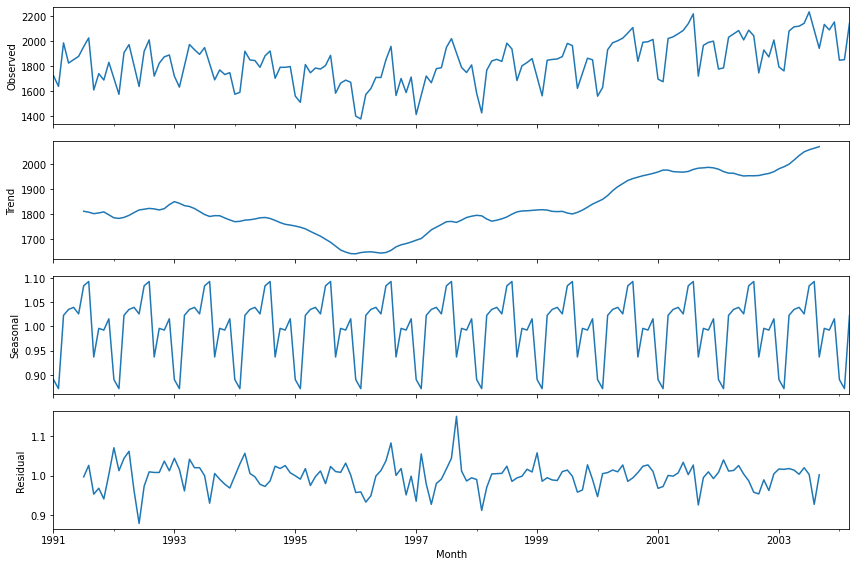

In [77]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Travellers , model="multiplicative")
fig = decomposition.plot()
plt.show()

## Build And Evaluate Time Series Forecast

### Splitting Time Series to Train and Test Sets

In [83]:
len(data)

159

In [81]:
train_len = 120
train = data[0:train_len]
test = data[train_len:]

In [88]:
train.head()

,Travellers,Traveller_Mean_imputation,Travellers_Linear_Interpolation,Traveller_last_value_imputation,Traveller_next_value_imputation
Month,,,,,
1991-01-01,1724.0,1724.000000,1724.0,1724.0,1724.0
1991-02-01,1638.0,1638.000000,1638.0,1638.0,1638.0
1991-03-01,1987.0,1987.000000,1987.0,1987.0,1987.0
1991-04-01,1825.0,1825.000000,1825.0,1825.0,1825.0
1991-05-01,1852.0,1837.547297,1852.0,1825.0,1879.0


### Naive method

In [89]:
y_hat_naive = test.copy()

In [95]:
y_hat_naive.head()

,Travellers,Traveller_Mean_imputation,Travellers_Linear_Interpolation,Traveller_last_value_imputation,Traveller_next_value_imputation,naive_forecast
Month,,,,,,
2001-01-01,1696.0,1696.0,1696.0,1696.0,1696.0,2015.0
2001-02-01,1675.0,1675.0,1675.0,1675.0,1675.0,2015.0
2001-03-01,2022.0,2022.0,2022.0,2022.0,2022.0,2015.0
2001-04-01,2036.0,2036.0,2036.0,2036.0,2036.0,2015.0
2001-05-01,2060.0,2060.0,2060.0,2060.0,2060.0,2015.0


In [92]:
y_hat_naive['naive_forecast'] = train['Travellers'][train_len-1] # Forecast is the last obversation in train set

##### Plot Train , Test and Forecast

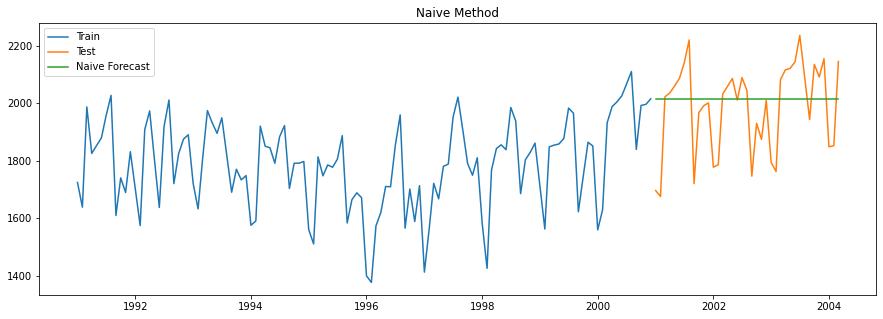

In [91]:
plt.figure(figsize=(15,5))
plt.plot(train['Travellers'] , label='Train')
plt.plot(test['Travellers'] , label='Test')
plt.plot(y_hat_naive['naive_forecast'] , label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

#### Calculate RSME and MAPE to evaluate forecast for Naive Method

In [116]:
from sklearn.metrics import mean_squared_error

In [128]:
rsme = np.sqrt(sklearn.metrics.mean_squared_error(test['Travellers'] , y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs((test['Travellers']-y_hat_naive['naive_forecast'])/test['Travellers'])*100),2)
result = pd.DataFrame({'Method': ['Naive Method'] , 'MAPE': [mape] , 'RSME':[rsme]})
results_nav = result[['Method' , 'RSME' , 'MAPE']]
results_nav

,Method,RSME,MAPE
0,Naive Method,153.7,6.42


### Simple Average Model

In [103]:
y_hat_avg = test.copy()

In [104]:
y_hat_avg['Avg_Forcast'] = train['Travellers'].mean()

#### Plot Train , Test and Forecast

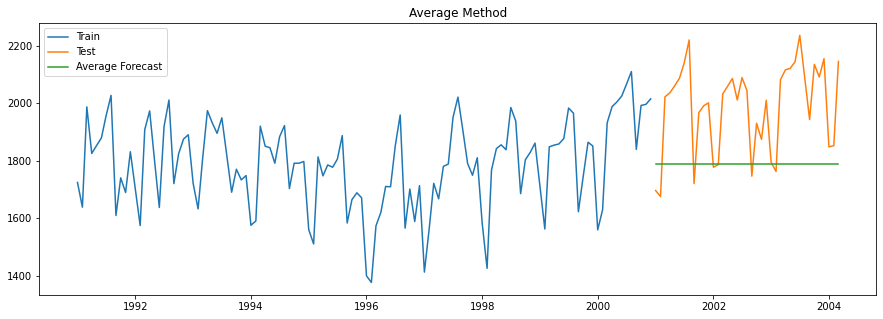

In [105]:
plt.figure(figsize=(15,5))
plt.plot(train['Travellers'] , label='Train')
plt.plot(test['Travellers'] , label='Test')
plt.plot(y_hat_avg['Avg_Forcast'] , label='Average Forecast')
plt.legend(loc='best')
plt.title('Average Method')
plt.show()

#### Calculate RSME and MAPE to evaluate forecast for Simple Average Method

In [129]:
rsme = np.sqrt(sklearn.metrics.mean_squared_error(test['Travellers'] , y_hat_avg['Avg_Forcast'])).round(2)
mape = np.round(np.mean(np.abs((test['Travellers']-y_hat_avg['Avg_Forcast'])/test['Travellers'])*100),2)
temp_result = pd.DataFrame({'Method': ['Simple Average Method'] , 'MAPE': [mape] , 'RSME':[rsme]})
results = pd.concat([results_nav , temp_result])
results

,Method,RSME,MAPE
0,Naive Method,153.70,6.42
0,Simple Average Method,252.55,10.65
